# Seminar Mathematics of Shock Waves
Steffen Gerhäusser SoSe 2023
# 9. The Euler equations of gas dynamics 

## Outline
- Fluid dynamics
- Hyperbolic Structure
- Rankine–Hugoniot jump conditions
- Exact solution of the Riemann problem
- Riemann problems with vacuum

## Fluid dynamics

- Leonhard Euler, born in 1707 in Basel, Switzerland, was one of the most prolific and influential mathematicians of his time.
<center>
<div>
<img src="figures/Leonhard_Euler_2.jpg" width="300">
</div>
</center>

- Equations first introduced by Leonhard Euler in 1755 in his work titled "Principes généraux du mouvement des fluides" (General Principles of Fluid Motion). 

- Euler's study focused on an idealized case of fluid flow, where the fluid was considered incompressible and without viscosity.





- Today building block for Navier Stokes Equations


# Continuum mechanics

- text passage from the book: 
A fluid is made up of many tiny molecules. The density and velocity we are modeling are average values over some small region of space. The individual molecules
in that region are not all moving with the exact velocity u; that’s just their average. Each molecule also has some additional random velocity component. These random velocities are what accounts for the pressure of the fluid p.

- definition:
Continuum mechanics describes gases using continuous functions of spatial position and time, such as density, velocity, and pressure

<center>
<div>
<img src="figures/continuum.jpg" width="800">
</div>
</center>


## Assumptions:
- No empty spaces, infinitesimal division and validity threshold

- Comment:
continuum assumption may break down for small scales (e.g. molecules) or rarefied gases



## Governing Equations


### 1. Mass conservation:


$$\rho_t + (\rho u)_x = 0.$$

with:
- $\rho (x, t)$ to denote the fluid density
- $u (x, t)$ to denote the velocity

### 2. Momentum conservation:

$$(\rho u)_t + (\rho u^2 + p)_x = 0.$$

with:
- the momentum density is given by the product of mass density and velocity $\rho u$
### 3. Energy conservation:

Defintion of Energy:
$$E = \rho e + \frac{1}{2}\rho u^2.$$

$$E_t + (u(E+p))_x = 0.$$


- compare to first law of thermodynamics



### 4. Equation of State (EOS)
Assumption: polytropic ideal gas 
- Particles: An ideal gas is composed of a large number of tiny particles (atoms or molecules) that are in constant, random motion.
- Forces: The particles of an ideal gas do not interact with each other except during collisions, which are considered to be perfectly elastic (no energy loss).
- Intermolecular Forces: The ideal gas assumes that there are no attractive or repulsive forces between the gas particles.

Four unknowns and three equations, therefore EOS is needed to close the system

$$p = \rho e (\gamma-1).$$

# Entropy

- Entropy is used to govern the direction of a process (second law of thermodynamics).
 



specific entropy:

$$ s = c_v \log(p/\rho^\gamma) + C,$$

Book:
- To be physically correct, the entropy of the gas must *increase* as gas molecules pass through the shock, leading to the *entropy condition* for selecting shock waves.
- shock wave exhibits jump in entropy

## Example

In [72]:
def plot_with_stripes_t_slider(t):
    euler_demos.plot_with_stripes(rho_l=3.,u_l=0.,p_l=3., rho_r=1.,u_r=0.,p_r=1., gamma=gamma,t=t)
    
interact(plot_with_stripes_t_slider, t=widgets.FloatSlider(min=0.,max=10.,step=0.1,value=0.5));

interactive(children=(FloatSlider(value=0.5, description='t', max=10.0), Output()), _dom_classes=('widget-inte…

# Hyperbolic Structure 

$$q_t + f(q)_x = 0$$




![Euler](figures/transformation.png)


The eigenvalues of the flux Jacobian $f'(q)$ for the 1D Euler equations are:

\begin{align}
\lambda_1 & = u-c & \lambda_2 & = u & \lambda_3 & = u+c
\end{align}

Here $c$ is the sound speed:

$$ c = \sqrt{\frac{\gamma p}{\rho}}.$$

## Eigenvectors
- show the relation between jumps in the primitive variables across waves in each family.
- Example: eigenvector $r_1$ indicates how the density $\rho$ changes as it moves along the characteristics curve with a speed of $\lambda_1$

![Euler](figures/invariants.png)


- The level sets of these Riemann invariants are two-dimensional surfaces; the intersection of two appropriate level sets defines an integral curve.

## Integral curves

$$\rho(p) = (p/p_0)^{1/\gamma} \rho_0.$$
$$u(p) = u_0 \pm \frac{2c_0}{\gamma-1}\left(1-(p/p_0)^{(\gamma-1)/(2\gamma)}\right).$$


## Rankine–Hugoniot jump conditions

$$\rho(p) = \left(\frac{1 + \beta p/p_0}{p/p_\ell + \beta} \right).$$
$$u(p) = u_0 \pm \frac{2c_0}{\sqrt{2\gamma(\gamma-1)}} \left(\frac{1-p/p_0}{\sqrt{1+\beta p/p_0}}\right).$$

In [73]:
%matplotlib inline

In [76]:
%config InlineBackend.figure_format = 'svg'
from exact_solvers import euler
from exact_solvers import euler_demos
from ipywidgets import widgets
from ipywidgets import interact
State = euler.Primitive_State
gamma = 1.4
print("Import solvers")

Import solvers


In [77]:
interact(euler.plot_integral_curves,
gamma=widgets.FloatSlider(min=1.1,max=3,value=1.4),
rho_0=widgets.FloatSlider(min=0.1,max=3.,value=1., 
description=r'$\rho_0$'));

interactive(children=(Checkbox(value=True, description='plot_1'), Checkbox(value=False, description='plot_3'),…

- entropy violating shock is not physical

# Exact solution of the riemann problem


1. Define a piecewise function giving the middle state velocity $u_m$ that can be connected to the left state by an entropy-satisfying shock or rarefaction, as a function of the middle-state pressure $p_m$.
2. Define a piecewise function giving the middle state velocity $u_m$ that can be connected to the right state by an entropy-satisfying shock or rarefaction, as a function of the middle-state pressure $p_m$.
3. Use a nonlinear rootfinder to find the intersection of the two functions defined above.
4. Use the Riemann invariants to find the intermediate state densities and the solution structure inside any rarefaction waves.

# Examples of Riemann solutions

## Shock tube problem:
- high pressure and density on the left, low pressure and density on the right

In [60]:
left_state  = State(Density = 3.,
                    Velocity = 0.,
                    Pressure = 3.)
right_state = State(Density = 1.,
                    Velocity = 0.,
                    Pressure = 1.)

euler.riemann_solution(left_state,right_state)

interactive(children=(FloatSlider(value=0.5, description='t', max=0.9), Dropdown(description='Show characteris…

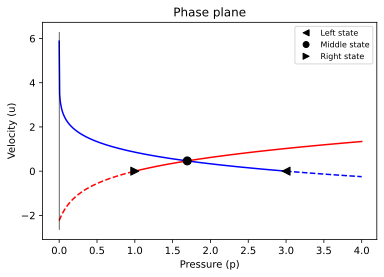

In [61]:
euler.phase_plane_plot(left_state, right_state)

## Symmetric Expansion

- equal density, pressure and velocity but opposite direction

In [62]:
left_state  = State(Density = 1.,
                    Velocity = -3.,
                    Pressure = 1.)
right_state = State(Density = 1.,
                    Velocity = 3.,
                    Pressure = 1.)

euler.riemann_solution(left_state,right_state);

interactive(children=(FloatSlider(value=0.5, description='t', max=0.9), Dropdown(description='Show characteris…

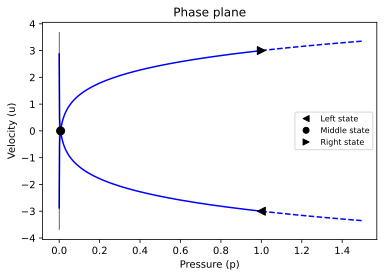

In [63]:
euler.phase_plane_plot(left_state, right_state)

## Colliding flows

In [64]:
left_state  = State(Density = 1.,
                    Velocity = 3.,
                    Pressure = 1.)
right_state = State(Density = 1.,
                    Velocity = -3.,
                    Pressure = 1.)

euler.riemann_solution(left_state,right_state)

interactive(children=(FloatSlider(value=0.5, description='t', max=0.9), Dropdown(description='Show characteris…

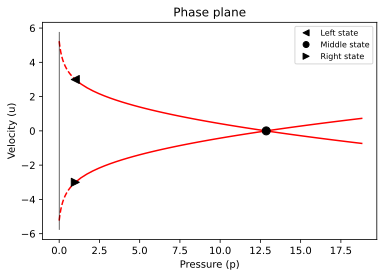

In [65]:
euler.phase_plane_plot(left_state, right_state)

# Colored tracer

In [66]:
def plot_with_stripes_t_slider(t):
    euler_demos.plot_with_stripes(rho_l=3.,u_l=0.,p_l=3.,
                                  rho_r=1.,u_r=0.,p_r=1.,
                                  gamma=gamma,t=t)
    
interact(plot_with_stripes_t_slider, 
         t=widgets.FloatSlider(min=0.,max=1.,step=0.1,value=0.5));

interactive(children=(FloatSlider(value=0.5, description='t', max=1.0), Output()), _dom_classes=('widget-inter…

# Riemann problem with vacuum state

- similiar to dry state in shallow water equations


## Initial vacuum state

- density and pressure set to zero in the left state

In [67]:
left_state  = State(Density =0.,
                    Velocity = 0.,
                    Pressure = 0.)
right_state = State(Density = 1.,
                    Velocity = -3.,
                    Pressure = 1.)

euler.riemann_solution(left_state,right_state)

interactive(children=(FloatSlider(value=0.5, description='t', max=0.9), Dropdown(description='Show characteris…

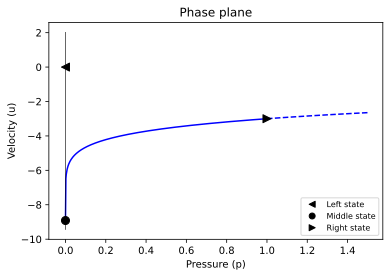

In [68]:
euler.phase_plane_plot(left_state, right_state)

# Middle vacuum state

-basically the opposite of colliding flows

In [69]:
left_state  = State(Density =1.,
                    Velocity = -10.,
                    Pressure = 1.)
right_state = State(Density = 1.,
                    Velocity = 10.,
                    Pressure = 1.)

euler.riemann_solution(left_state,right_state)

interactive(children=(FloatSlider(value=0.5, description='t', max=0.9), Dropdown(description='Show characteris…

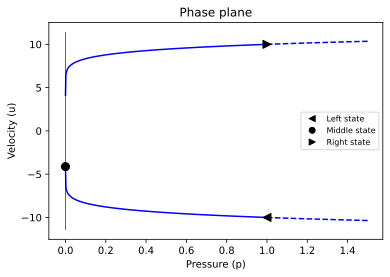

In [70]:
euler.phase_plane_plot(left_state, right_state)

# Additional References

- Euler, Leonhard (1757). "Principes généraux du mouvement des fluides" [The General Principles of the Movement of Fluids]. Mémoires de l'académie des sciences de Berlin (in French). 11: 274–315.


## Images
- https://de.wikipedia.org/wiki/Leonhard_Euler#/media/Datei:Leonhard_Euler_2.jpg
- https://i.ytimg.com/vi/f-5bEbp2qYM/maxresdefault.jpg
